# Challenge description

Challenges of the day:

- Plot a bar graph to show the rating distribution. Means that, a bar chart shows how many business are rated as 1 star, 1.5 stars and so on

- Find a way to find the unique categories, and plot a bar chart to show 20 most popular categories

- Plot a bar chart to show top 20 cities that have the most number businesses

- Select 1 city of your choice, then:

-filter out all businesses in that city

-find the 5 most popular business categories.

-plot a bar chart to show the amount of checkins by hours of each business in the top 5 above ( meaning, x-axis is the hours, and y-axis is the amount of checkins)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
business = pd.read_csv('yelp_business.csv')
b_attributes = pd.read_csv ('yelp_business_attributes.csv')
hours = pd.read_csv ('yelp_business_hours.csv')
checkin = pd.read_csv ('yelp_checkin.csv')
tip = pd.read_csv ('yelp_tip.csv')

In [3]:
business.head(2)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...


In [4]:
business.stars.unique()

array([4. , 3. , 1.5, 3.5, 5. , 4.5, 2. , 2.5, 1. ])

## Plot a bar graph to show the rating distribution. 

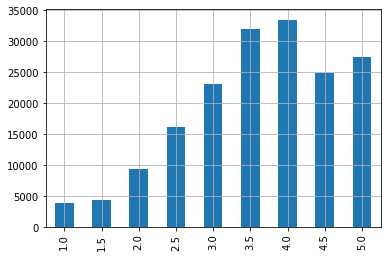

In [5]:
business.stars.value_counts().sort_index(ascending = True).plot ('bar', grid='-')

## Find a way to find the unique categories, and plot a bar chart to show 20 most popular categories

### Fisrt solution 

It implies just to extract the df's column and after several manipulations plot a new data frame containing only the categories' values. The disadventage of this solution, that it does not allow us to keep the index from the entire table and to merge with the new one afterwards.

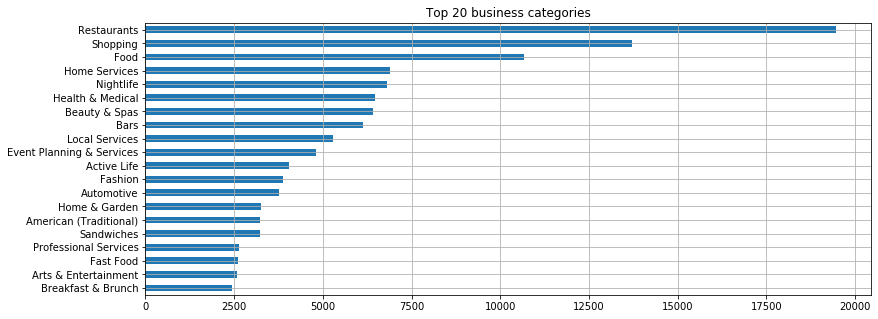

In [17]:
newlist=business["categories"].tolist() # converts the column "categories" into a list
b = " ".join(str(x) for x in newlist) # converts a list into a string
c= b.split(';') #Putting each element in '""' 
c[:]
categ_df= pd.DataFrame(c[:]) #creating new df from list
categ_df.head(5)
categ_df.columns = ['categories'] # rename the df column
categ_df.categories.value_counts().head(20).sort_values(ascending =True).plot(kind='barh', figsize=(13,5), title = 'Top 20 business categories', grid = '-') #plotting
plt.show()
#b[:200]

### Second solution 

The following solution compare to the previous one allows us to utilize created data frame in further discoveries as it keeps the index (extracted from "business_id" column) from entire df.  

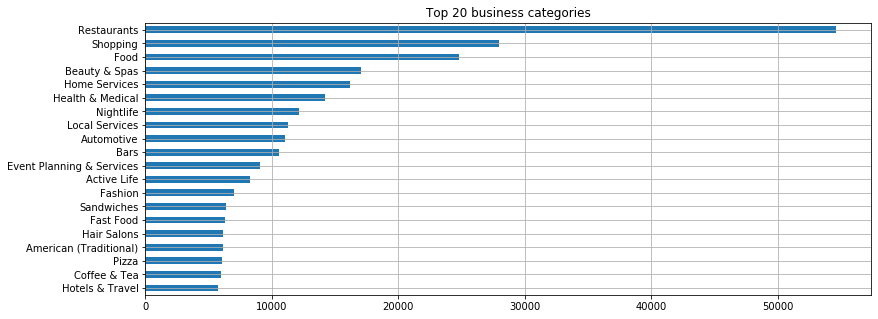

In [7]:
b_categories_df = pd.DataFrame(business.categories.str.split(';').tolist(), index=business.business_id).stack()
b_categories_df.head(20)
b_categories_df = b_categories_df.reset_index([0, 'business_id'])
b_categories_df[b_categories_df['business_id'] == 'FYWN1wneV18bWNgQjJ2GNg']
#b_categories_df.head(20)
b_categories_df.columns=['business_id','categories']
b_categories_df.categories.value_counts().head(20).sort_values(ascending=True).plot(kind='barh', figsize =(13,5), grid ='-',title = 'Top 20 business categories')
plt.show()

## Plot a bar chart to show top 20 cities that have the most number of businesses

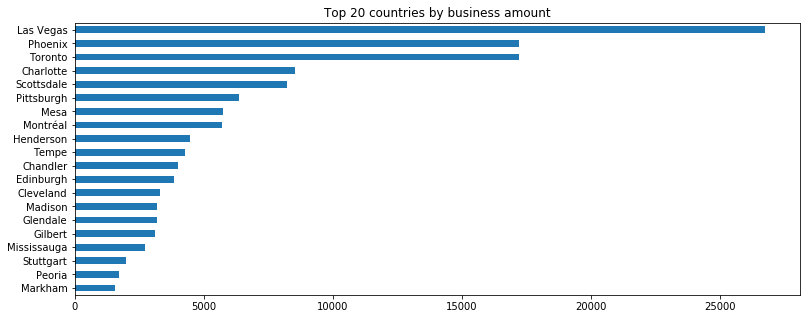

In [19]:
business.city.value_counts().head(20).sort_values(ascending =True).plot(kind='barh',figsize= (13,5), title = 'Top 20 countries by business amount')

## Select 1 city of your choice, then:

- filter out all businesses in that city
- find the 5 most popular business categories.
- sort your database based on these categories
- plot a bar chart to show the amount of checkins by hours of each business rated as top 5 ( meaning, x-axis is the hours, and y-axis is the amount of checkins)

### Chosen city: Las-Vegas

In [10]:
Las_vegas = business[business["city"]=='Las Vegas'][['business_id','name']]

In [11]:
### List of top 5 categories in Las_vegas

In [12]:
Las_vegas_categories = pd.merge(Las_vegas,b_categories_df)
LV_b_chekin = pd.merge(Las_vegas_categories,checkin)
top_5_cat_in_vegas = pd.DataFrame(Las_vegas_categories.categories.value_counts().head(5).sort_values(ascending=False))
top_5_cat_in_vegas.head()
top_5_cat_list = list(top_5_cat_in_vegas.index)
top_5_cat_list

['Restaurants', 'Shopping', 'Home Services', 'Beauty & Spas', 'Food']

In [13]:
top_checkin_df = pd.DataFrame(LV_b_chekin.groupby('name')['checkins'].sum().sort_values(ascending=False).head(5).sort_values(ascending=False))
top_checkin_df.head(7)
lst_top5b_in_top5c_in_LV= list(top_checkin_df.index)
lst_top5b_in_top5c_in_LV

['"McCarran International Airport"',
 '"Yard House"',
 '"Earl of Sandwich"',
 '"Las Vegas Athletic Club"',
 '"The Cosmopolitan of Las Vegas"']

In [14]:
LV_b_chekin.hour=pd.to_datetime(LV_b_chekin.hour, format = '%H:%M').dt.hour

In [15]:
LV_b_chekin.info()
LV_b_chekin.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3763120 entries, 0 to 3763119
Data columns (total 6 columns):
business_id    object
name           object
categories     object
weekday        object
hour           int64
checkins       int64
dtypes: int64(2), object(4)
memory usage: 201.0+ MB


,business_id,name,categories,weekday,hour,checkins
0,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",Shopping,Wed,22,2
1,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",Shopping,Sun,0,1
2,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",Shopping,Sun,21,1
3,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",Shopping,Sat,0,1
4,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",Shopping,Sat,22,1


In [30]:
def top_check(list=lst_top5b_in_top5c_in_LV):
    for i in list:
        a = LV_b_chekin[LV_b_chekin['name']==i].groupby('hour')["checkins"].sum()
        a.plot(kind = 'bar',figsize=(15,5),title = f"Check Ins by time of {i}", grid='-')
        print (plt.show())
#checkin_by_cntr[checkin_by_cntr['name']=='"Las Vegas Athletic Club"'].groupby('hour')["checkins"].sum().plot.bar(figsize=(10,5))

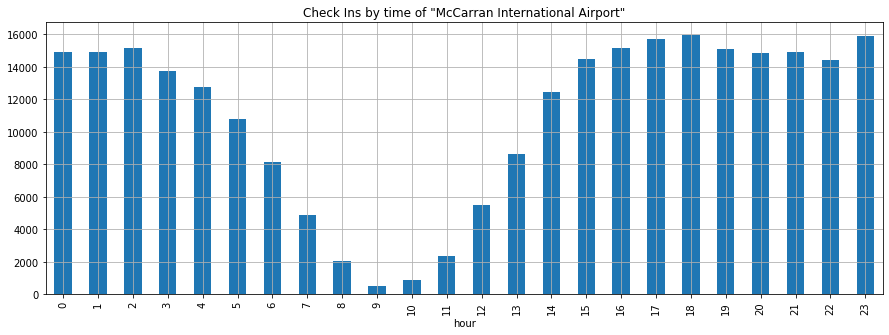

None


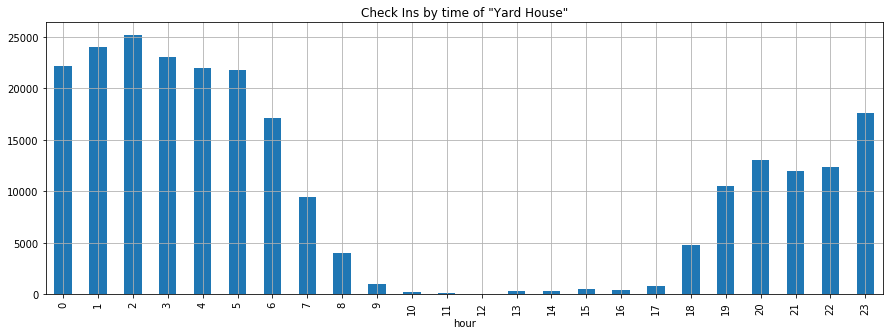

None


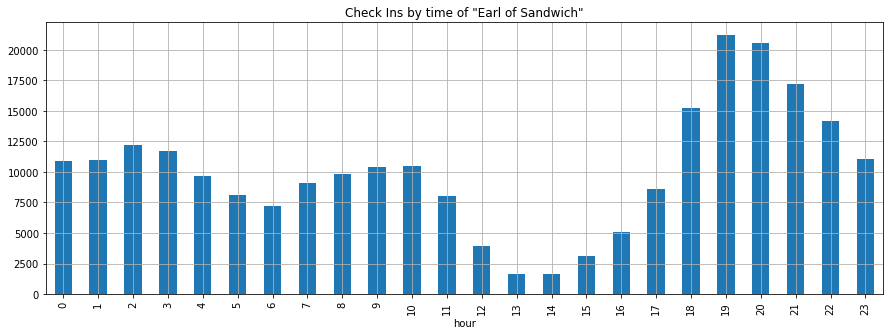

None


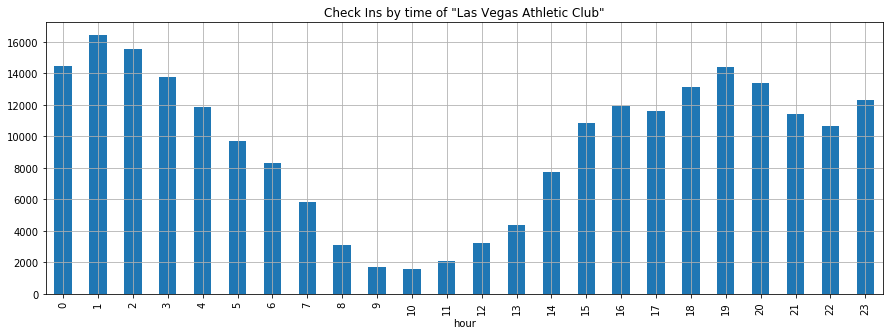

None


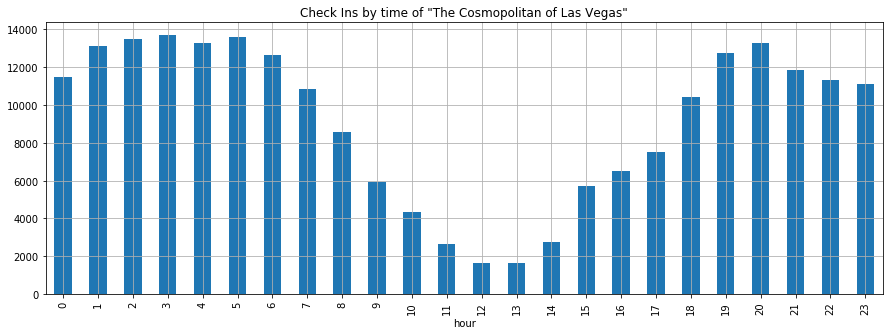

None


In [31]:
top_check()